In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
%run '/content/drive/My Drive/PLATZI-Documentos/1.Practice_projects/GitHub/Learning-AI-and-ML-with-a-Marketing-Campaign-dataset/3.-Standardization, PCA & K_Means.ipynb'

General settings

In [3]:
mk = mk.astype({'clusters':'category','#_children_at_home':'category','Promotion_#_campaign_accepted':'category'})
mk = mk.sort_values('clusters')
colors= ['#7497ED','#EE4C87','#38E542']
sns_colors = {0:'#7497ED', 1:'#EE4C87', 2:'#38E542'}
labels1=['Cluster 1', 'Cluster 2', 'Cluster 3']
labels2=['1', '2', '3']

### **General view of the cluster´s universe**

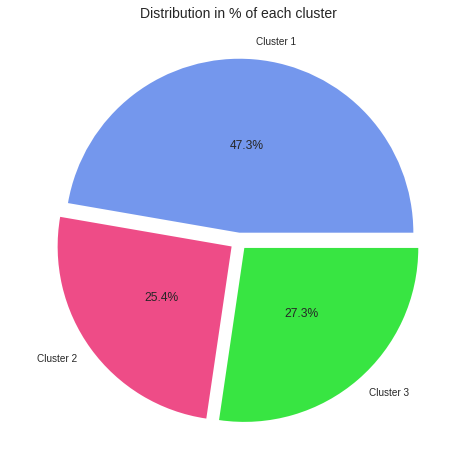

In [4]:
plt.subplots(1, 1, figsize=(8,8))

data = mk.groupby("clusters")['Income'].count()
g1 = data.plot(kind='pie', autopct="%.1f%%", labels=labels1, colors= colors, explode=[0.05]*3, pctdistance=0.5, legend=[] )
g1.set_title("Distribution in % of each cluster", fontsize=14)
g1.set_ylabel(' ')

plt.show()

### **General characteristics of the population**

Let´s start to analyze the characteristics of each cluster

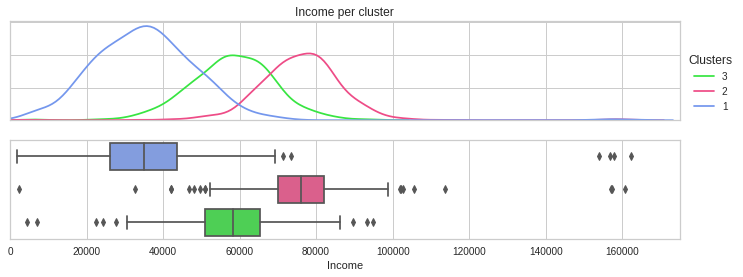

In [5]:
# Income distribution per cluster
fig, ax = plt.subplots(2, 1, figsize=(12,4))

g1 = sns.kdeplot(mk['Income'],hue=mk['clusters'],palette= sns_colors ,ax = ax[0])
g1.set(yticklabels=[], xticklabels=[], title='Income per cluster', ylabel=None, xlabel=None)
g1.legend(labels=labels2[::-1],
        title="Clusters",
        loc="lower left",
        bbox_to_anchor=(1, 0, 0.5, 1))
ax[0].set_xlim(0,175000)

g2= sns.boxplot(data=mk, x='Income', y= 'clusters',palette= sns_colors, ax = ax[1])
g2.set(yticklabels=[], ylabel=None)
ax[1].set_xlim(0,175000)
plt.show()

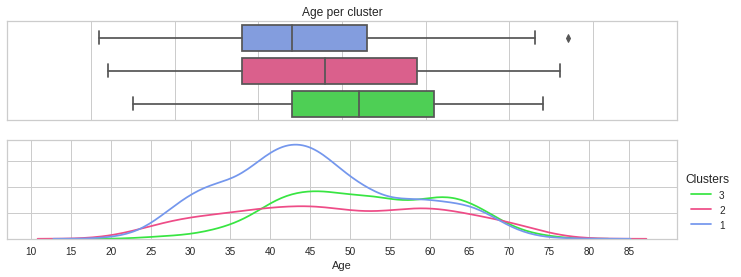

In [6]:
# Age distribution per cluster
fig, ax = plt.subplots(2, 1, figsize=(12,4))

g2= sns.boxplot(data=mk, x='Age', y= 'clusters',palette= sns_colors, ax = ax[0])
g2.set(yticklabels=[], xticklabels=[], title='Age per cluster', ylabel=None, xlabel=None)
ax[0].set_xlim(10,90)

g1 = sns.kdeplot(mk['Age'],hue=mk['clusters'],palette= sns_colors,ax = ax[1])
g1.set(yticklabels=[], ylabel=None)
g1.legend(labels=labels2[::-1],
        title="Clusters",
        loc="lower left",
        bbox_to_anchor=(1, 0, 0.5, 1))
plt.xticks(range(10, 90, 5))
plt.show()

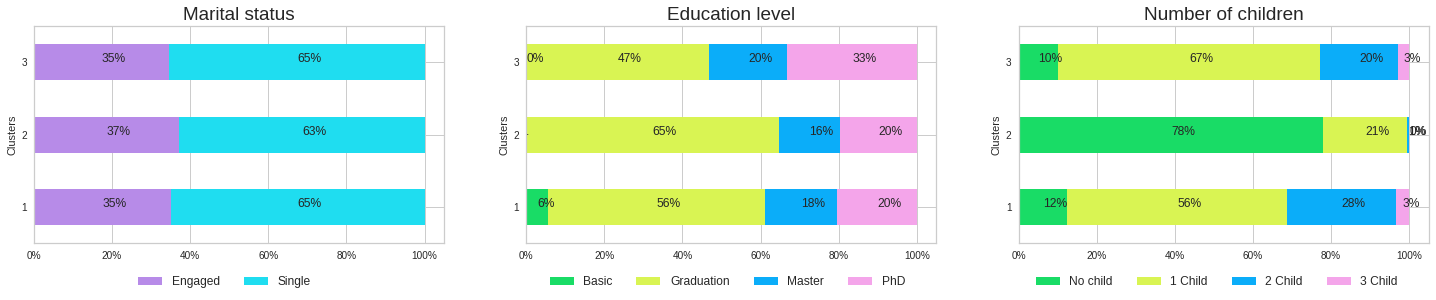

In [7]:
# Material status & Education level & number of childen in each cluster:

# Marital status: generating the dataframe:
status= pd.DataFrame(mk.groupby(['clusters','Marital_Status'])[['Education']].count()).reset_index()
status = status.pivot_table(values='Education', index='clusters', columns='Marital_Status').reset_index()

# Education level: generating the dataframe:
education = pd.DataFrame(mkd.groupby('clusters')[['Education_Basic','Education_Graduation','Education_Master','Education_PhD']].sum()).reset_index()

# Number of children:
children = pd.DataFrame(mk.groupby(['clusters','#_children_at_home'])[['Education']].count()).reset_index()
children = children.pivot_table(values='Education', index='clusters', columns='#_children_at_home').reset_index()

# Generating the graph:
fig, ax = plt.subplots(1,3, figsize=(25,4))
ax = ax.ravel()

barh_100_per(status, num_charts='several', axes=0, yticklabels=['1','2','3'], ylabel='Clusters', labels=['Engaged','Single'], color=['#B78BE8','#1FDDF0'],
             title='Marital status', titlefs=19, bbox_position= [0.75, 0], labelfs=12, box_ncol=500)

barh_100_per(education, num_charts='several',axes=1, yticklabels=['1','2','3'], ylabel='Clusters', labels=['Basic','Graduation','Master','PhD'],
             color=['#19DC66','#D9F453','#0BADF9','#F4A5EA'], title='Education level', titlefs=19, bbox_position= [1, 0], labelfs=12, box_ncol=500)

barh_100_per(children, num_charts='several',axes=2, yticklabels=['1','2','3'], ylabel='Clusters', labels=['No child','1 Child','2 Child','3 Child'],
             color=['#19DC66','#D9F453','#0BADF9','#F4A5EA'], title='Number of children', titlefs=19, bbox_position= [1, 0], labelfs=12, box_ncol=500)



plt.show()

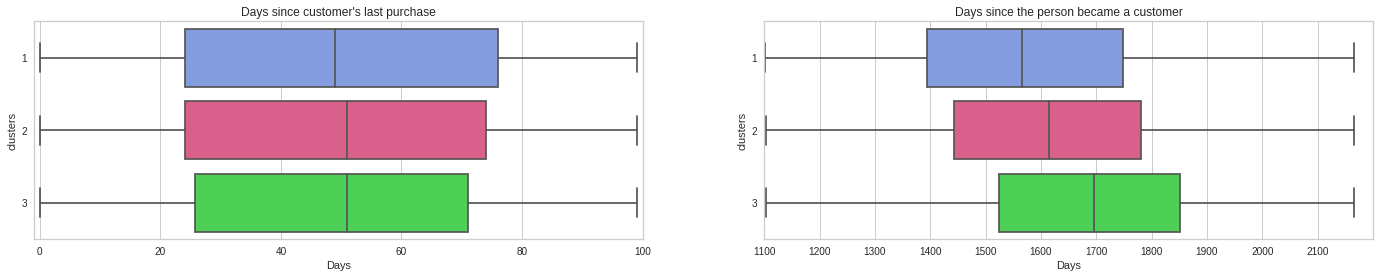

In [8]:
# Number of days since customer's last purchase
fig, ax = plt.subplots(1, 2, figsize=(24,4))
ax = ax.ravel()

g1= sns.boxplot(data=mk, x='Recency', y= 'clusters',palette= sns_colors, ax = ax[0])
g1.set(yticklabels=['1','2','3'], title='Days since customer\'s last purchase', xlabel='Days')
ax[0].set_xlim(-1,100)

# Number of days that have passed since the person started to be a customer´s company.
g2= sns.boxplot(data=mk, x='lifetime_so_far_days', y= 'clusters',palette= sns_colors, ax = ax[1])
g2.set(yticklabels=['1','2','3'], title='Days since the person became a customer', xlabel='Days')
ax[1].set_xlim(1100,2200)
plt.xticks(range(1100,2200, 100))

plt.show()

### **Product categories by cluster (Expenditure in the last 2 years)**

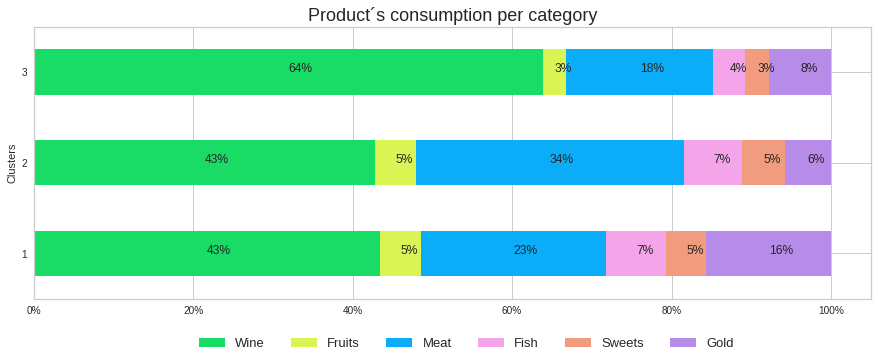

In [9]:
products = pd.DataFrame(mkd.groupby('clusters')[['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']].sum()).reset_index()
barh_100_per(products, yticklabels=['1','2','3'], fig_length=15,fig_width=5, ylabel='Clusters', labels=['Wine','Fruits','Meat','Fish','Sweets','Gold'], 
             color=['#19DC66','#D9F453','#0BADF9','#F4A5EA','#F19C7F','#B78BE8'], title='Product´s consumption per category', titlefs=18, 
             bbox_position= [0.9, 0], labelfs=13, box_ncol=500)


### **Promotion: Reaction to the campaigns**

**Accepted campaings**

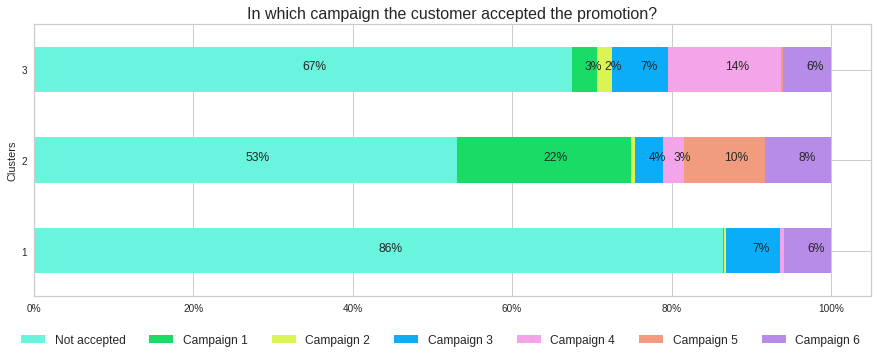

In [10]:
campaign = pd.DataFrame(mk.groupby(['clusters','Promotion_#_campaign_accepted'])[['Education']].count()).reset_index()
campaign = campaign.pivot_table(values='Education', index='clusters', columns='Promotion_#_campaign_accepted').reset_index()
barh_100_per(campaign, yticklabels=['1','2','3'], fig_length=15,fig_width=5, ylabel='Clusters', labels=['Not accepted','Campaign 1','Campaign 2','Campaign 3','Campaign 4','Campaign 5','Campaign 6'], 
             color=['#68F4DD','#19DC66','#D9F453','#0BADF9','#F4A5EA','#F19C7F','#B78BE8'], title='In which campaign the customer accepted the promotion?', titlefs=16, 
             bbox_position= [1.05, 0], labelfs=12, box_ncol=7)

**Purchase made with discount**

In [11]:
mk['total_purchases']= mk['NumStorePurchases']+mk['NumWebPurchases']+mk['NumWebPurchases']

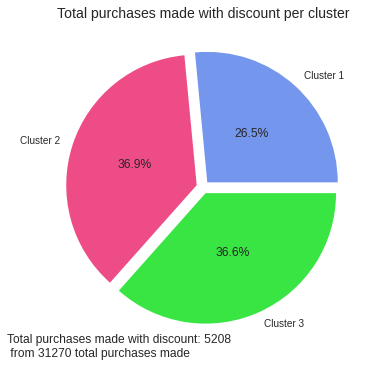

In [12]:
plt.subplots(1, 1, figsize=(6,6))
data = mk.groupby("clusters")['NumStorePurchases'].sum()
g1 = data.plot(kind='pie', autopct="%.1f%%", labels=labels1, colors= colors, explode=[0.05]*3, pctdistance=0.5, legend=[] )
g1.set_title("Total purchases made with discount per cluster", fontsize=14)
g1.set_ylabel(' ')
discount = str(mk['NumDealsPurchases'].sum())
total= str(mk['total_purchases'].sum())
g1.text(x= -1.5,y=-1.3,s='Total purchases made with discount: '+discount+'\n from '+total+' total purchases made', fontsize=12)
plt.show()

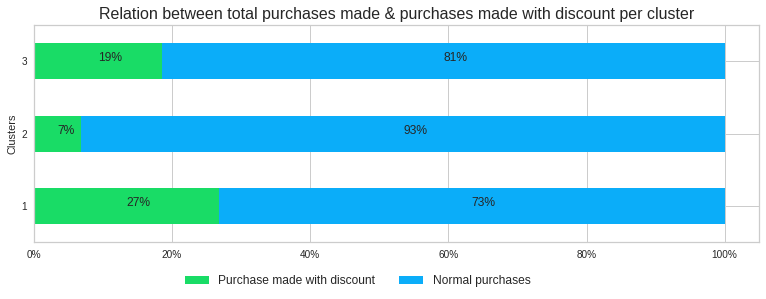

In [13]:
Purchase_com= pd.DataFrame(mk.groupby(['clusters'])[['total_purchases','NumDealsPurchases']].sum()).reset_index()
Purchase_com['Purchases_no_discount']= Purchase_com['total_purchases']-Purchase_com['NumDealsPurchases']
Purchase_com.drop(['total_purchases'], axis=1, inplace=True)

barh_100_per(Purchase_com, yticklabels=['1','2','3'], fig_length=13,fig_width=4, ylabel='Clusters', labels=['Purchase made with discount','Normal purchases'], 
             color=['#19DC66','#0BADF9'], title='Relation between total purchases made & purchases made with discount per cluster', titlefs=16, 
             bbox_position= [0.75, 0], labelfs=12)

### **Place: Where do the customers prefer to made their purchases?**

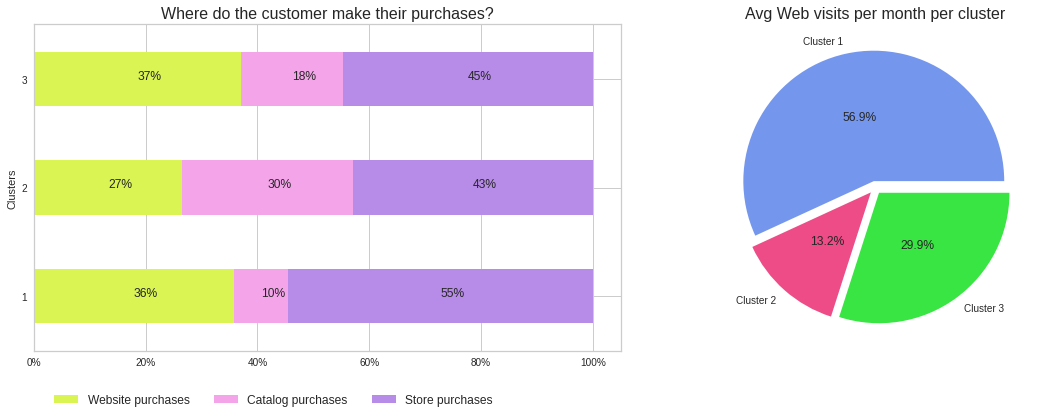

In [14]:
fig, ax = plt.subplots(1,2, figsize=(18,6), gridspec_kw={'width_ratios': [1.8, 1],'height_ratios': [1]})
ax = ax.ravel()
# Data
place = pd.DataFrame(mk.groupby(['clusters'])[['NumWebPurchases','NumCatalogPurchases', 'NumStorePurchases']].sum()).reset_index()
web_vis = pd.Series(mk.groupby('clusters')['NumWebVisitsMonth'].sum())

# Graphs
barh_100_per(place, num_charts='several',axes=0, yticklabels=['1','2','3'], fig_length=13,fig_width=4, ylabel='Clusters', labels=['Website purchases','Catalog purchases','Store purchases'], 
             color=['#D9F453','#F4A5EA','#B78BE8'], title='Where do the customer make their purchases?', titlefs=16, 
             bbox_position= [0.85, 0], labelfs=12)

g1 = web_vis.plot(kind='pie', autopct="%.1f%%", labels=labels1, colors= colors, explode=[0.05]*3, pctdistance=0.5, legend=[], ax=ax[1])
g1.set_title("Avg Web visits per month per cluster", fontsize=16)
g1.set_ylabel(' ')

plt.show()

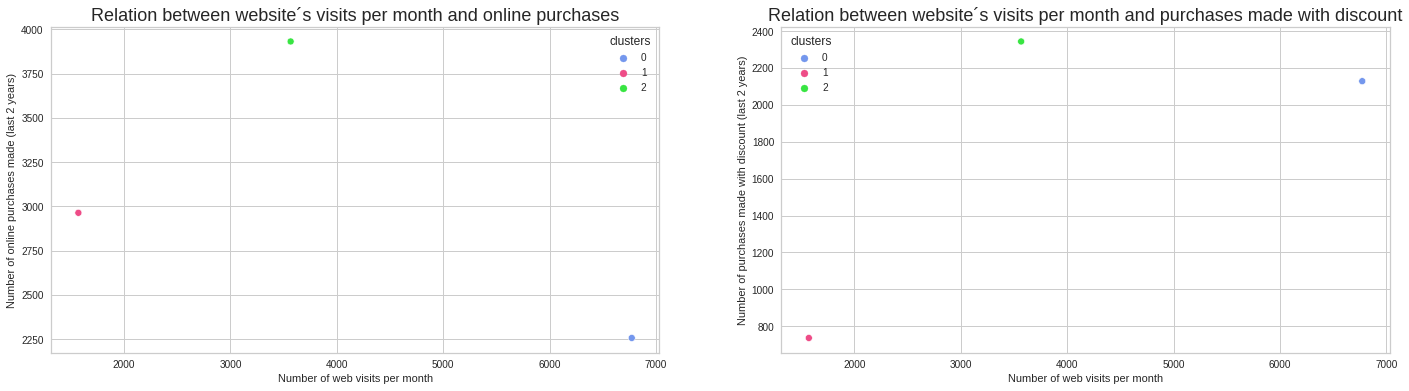

In [86]:
fig, ax = plt.subplots(1, 2, figsize=(24,6))
ax = ax.ravel()

r_web_pur = pd.DataFrame(mk.groupby(['clusters'])[['NumWebPurchases','NumWebVisitsMonth', 'NumDealsPurchases']].sum()).reset_index()
g1= sns.scatterplot(data=r_web_pur,y='NumWebPurchases',x='NumWebVisitsMonth', hue= 'clusters',palette= sns_colors, ax=ax[0])
g1.set( xlabel='Number of web visits per month',
       ylabel='Number of online purchases made (last 2 years)')
g1.set_title('Relation between website´s visits per month and online purchases', fontsize=18)

g2= sns.scatterplot(data=r_web_pur,y='NumDealsPurchases',x='NumWebVisitsMonth', hue= 'clusters',palette= sns_colors, ax=ax[1])
g2.set( xlabel='Number of web visits per month',
       ylabel='Number of purchases made with discount (last 2 years)')
g2.set_title('Relation between website´s visits per month and purchases made with discount', fontsize=18)
plt.show()